In [1]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

import os
import optuna

#models 
import xgboost as xgb
import lightgbm as lgb

from xgboost import plot_importance


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data=pd.read_csv('final_data.csv')

C:\Users\MSI\AppData\Local\Temp\ipykernel_2832\2355859285.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('final_data.csv')


In [3]:
data.head()

,CMPLNT_NUM,year,month,day,weekday,hour,Latitude,Longitude,COMPLETED,OFNS_DESC,...,JURISDICTION_CODE,IN_PARK,IN_PUBLIC_HOUSING,IN_STATION,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,25636218,2006,12,5,Tuesday,11,40.75,-74.00,COMPLETED,PROPERTY,...,0,1,1,1,UNKNOWN,WHITE,M,UNKNOWN,UNKNOWN,D
1,23364313,2006,7,12,Wednesday,14,40.70,-73.94,COMPLETED,PROPERTY,...,97,1,1,1,UNKNOWN,(null),(null),45-64,BLACK,M
2,25523851,2006,11,26,Sunday,16,40.70,-73.94,COMPLETED,PROPERTY,...,97,1,1,1,UNKNOWN,(null),(null),18-24,BLACK,F
3,25435616,2006,11,21,Tuesday,2,40.84,-73.80,ATTEMPTED,PROPERTY,...,0,1,1,1,UNKNOWN,BLACK,M,65+,WHITE,M
4,34143267,2007,9,1,Saturday,9,40.72,-74.00,COMPLETED,PROPERTY,...,0,1,1,1,UNKNOWN,BLACK,M,UNKNOWN,UNKNOWN,D


In [4]:
data.columns

Index(['CMPLNT_NUM', 'year', 'month', 'day', 'weekday', 'hour', 'Latitude',
       'Longitude', 'COMPLETED', 'OFNS_DESC', 'ADDR_PCT_CD', 'CRIME_CLASS',
       'BORO_NM', 'PREM_TYP_DESC', 'OCCURENCE', 'JURIS_DESC',
       'JURISDICTION_CODE', 'IN_PARK', 'IN_PUBLIC_HOUSING', 'IN_STATION',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE',
       'VIC_SEX'],
      dtype='object')

In [5]:
#example from the dataset
print(data.iloc[0])

CMPLNT_NUM                   25636218
year                             2006
month                              12
day                                 5
weekday                       Tuesday
hour                               11
Latitude                        40.75
Longitude                       -74.0
COMPLETED                   COMPLETED
OFNS_DESC                    PROPERTY
ADDR_PCT_CD                      13.0
CRIME_CLASS                    FELONY
BORO_NM                     MANHATTAN
PREM_TYP_DESC                    BANK
OCCURENCE                      INSIDE
JURIS_DESC           N.Y. POLICE DEPT
JURISDICTION_CODE                   0
IN_PARK                             1
IN_PUBLIC_HOUSING                   1
IN_STATION                          1
SUSP_AGE_GROUP                UNKNOWN
SUSP_RACE                       WHITE
SUSP_SEX                            M
VIC_AGE_GROUP                 UNKNOWN
VIC_RACE                      UNKNOWN
VIC_SEX                             D
Name: 0, dty

Statistiques descriptives pour ADDR_PCT_CD:
count    8.913192e+06
mean     6.336830e+01
std      3.459529e+01
min      1.000000e+00
25%      4.000000e+01
50%      6.300000e+01
75%      9.400000e+01
max      1.230000e+02
Name: ADDR_PCT_CD, dtype: float64


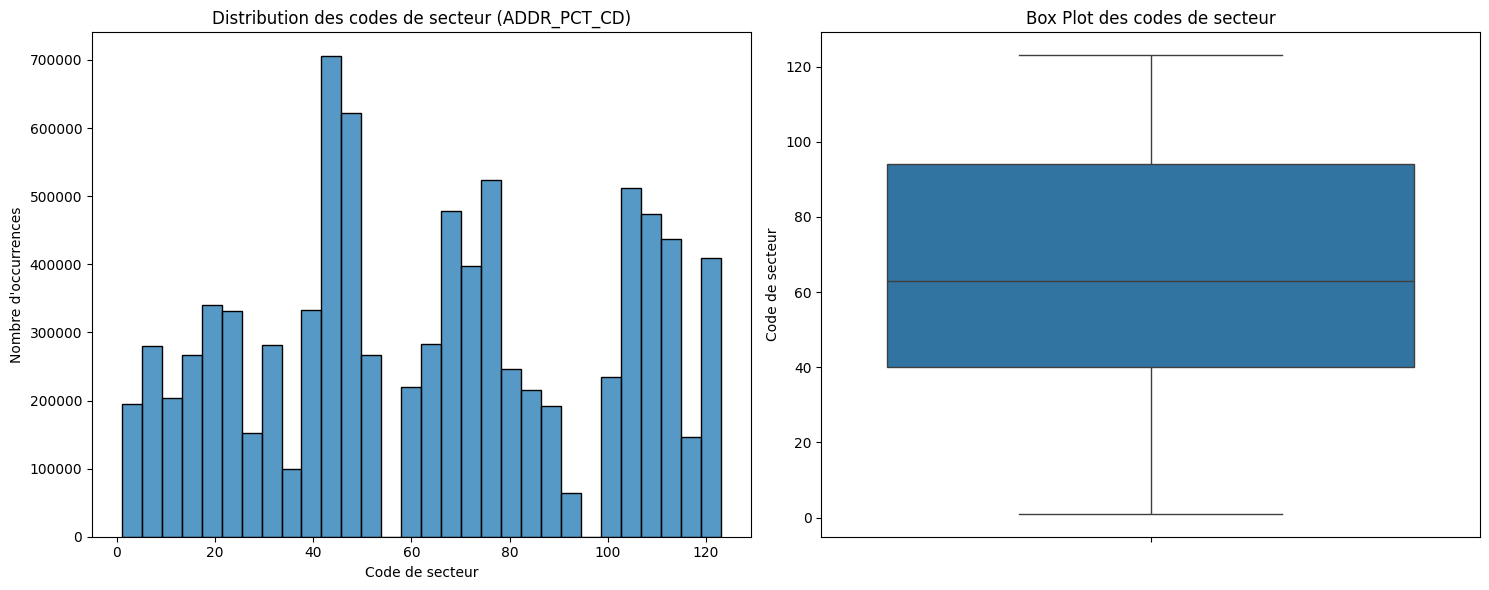


Distribution des valeurs (top 10):


NameError: name 'df' is not defined

In [9]:
# Imports nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Statistiques descriptives
print("Statistiques descriptives pour ADDR_PCT_CD:")
print(data['ADDR_PCT_CD'].describe())

# Créer une figure avec deux sous-graphiques
plt.figure(figsize=(15, 6))

# Premier sous-graphique : Histogramme
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='ADDR_PCT_CD', bins=30)
plt.title('Distribution des codes de secteur (ADDR_PCT_CD)')
plt.xlabel('Code de secteur')
plt.ylabel('Nombre d\'occurrences')

# Deuxième sous-graphique : Box plot
plt.subplot(1, 2, 2)
sns.boxplot(y=data['ADDR_PCT_CD'])
plt.title('Box Plot des codes de secteur')
plt.ylabel('Code de secteur')

plt.tight_layout()
plt.show()

# Afficher les fréquences des valeurs
print("\nDistribution des valeurs (top 10):")
print(df['ADDR_PCT_CD'].value_counts().sort_index().head(10))

# Afficher le pourcentage de valeurs manquantes s'il y en a
missing = (df['ADDR_PCT_CD'].isnull().sum() / len(df)) * 100
print(f"\nPourcentage de valeurs manquantes : {missing:.2f}%")

In [7]:
data.OFNS_DESC.unique()

array(['PROPERTY', 'SEXUAL', 'PERSONAL', 'DRUGS/ALCOHOL', 'OTHER',
       'ADMINISTRATIVE'], dtype=object)

In [8]:
filtered_df = data[~data['OFNS_DESC'].isin(['ADMINISTRATIVE', 'OTHER'])]
data=filtered_df
data.OFNS_DESC.unique()

array(['PROPERTY', 'SEXUAL', 'PERSONAL', 'DRUGS/ALCOHOL'], dtype=object)

In [9]:
# Create a dictionary to store the mapping
label_mapping = {}

# Original column values
original_values = data['OFNS_DESC'].unique()
label_encoder=LabelEncoder()
# Apply label encoding
data['target'] = label_encoder.fit_transform(data['OFNS_DESC'])

# New column values after label encoding
new_values = data['target'].unique()

# Populate the dictionary
label_mapping['original_to_encoded'] = dict(zip(original_values, new_values))
label_mapping['encoded_to_original'] = dict(zip(new_values, original_values))

# Print the dictionary
print(label_mapping)


{'original_to_encoded': {'PROPERTY': 2, 'SEXUAL': 3, 'PERSONAL': 1, 'DRUGS/ALCOHOL': 0}, 'encoded_to_original': {2: 'PROPERTY', 3: 'SEXUAL', 1: 'PERSONAL', 0: 'DRUGS/ALCOHOL'}}


In [10]:
data.columns

Index(['CMPLNT_NUM', 'year', 'month', 'day', 'weekday', 'hour', 'Latitude',
       'Longitude', 'COMPLETED', 'OFNS_DESC', 'ADDR_PCT_CD', 'CRIME_CLASS',
       'BORO_NM', 'PREM_TYP_DESC', 'OCCURENCE', 'JURIS_DESC',
       'JURISDICTION_CODE', 'IN_PARK', 'IN_PUBLIC_HOUSING', 'IN_STATION',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE',
       'VIC_SEX', 'target'],
      dtype='object')

Balancing the data

In [14]:
min_count = data['target'].value_counts().min()

# Sample the same number of examples for each class
balanced_data = data.groupby('target').apply(lambda x: x.sample(min_count)).reset_index(drop=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_9436\1352695909.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_data = data.groupby('target').apply(lambda x: x.sample(min_count)).reset_index(drop=True)


In [15]:
balanced_data.target.value_counts()

target
0    563326
1    563326
2    563326
3    563326
Name: count, dtype: int64

# DATA PREPARATION
Choosing the columns that we will use in our Model

In [16]:
# Set the list of features to include in Machine Learning Model
feature_lst=['year', 'month', 'day', 'hour', 'Latitude',
       'Longitude', 'COMPLETED', 'ADDR_PCT_CD',
       'BORO_NM','IN_PARK', 'IN_PUBLIC_HOUSING',
       'IN_STATION', 'VIC_AGE_GROUP', 'VIC_RACE','VIC_SEX','target']

df_sel=data[feature_lst].copy()
df_sel.info()
df_sel.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7761268 entries, 0 to 8913191
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   year               int64  
 1   month              int64  
 2   day                int64  
 3   hour               int64  
 4   Latitude           float64
 5   Longitude          float64
 6   COMPLETED          object 
 7   ADDR_PCT_CD        float64
 8   BORO_NM            object 
 9   IN_PARK            int64  
 10  IN_PUBLIC_HOUSING  int64  
 11  IN_STATION         int64  
 12  VIC_AGE_GROUP      object 
 13  VIC_RACE           object 
 14  VIC_SEX            object 
 15  target             int32  
dtypes: float64(3), int32(1), int64(7), object(5)
memory usage: 977.0+ MB


,year,month,day,hour,Latitude,Longitude,COMPLETED,ADDR_PCT_CD,BORO_NM,IN_PARK,IN_PUBLIC_HOUSING,IN_STATION,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,target
0,2006,12,5,11,40.75,-74.00,COMPLETED,13.0,MANHATTAN,1,1,1,UNKNOWN,UNKNOWN,D,2
1,2006,7,12,14,40.70,-73.94,COMPLETED,79.0,BROOKLYN,1,1,1,45-64,BLACK,M,2
2,2006,11,26,16,40.70,-73.94,COMPLETED,77.0,BROOKLYN,1,1,1,18-24,BLACK,F,2
3,2006,11,21,2,40.84,-73.80,ATTEMPTED,45.0,BRONX,1,1,1,65+,WHITE,M,2
4,2007,9,1,9,40.72,-74.00,COMPLETED,1.0,MANHATTAN,1,1,1,UNKNOWN,UNKNOWN,D,2


In [17]:
completed_mapping={'COMPLETED':1,'ATTEMPTED':0}
# Apply the mapping to the COMPLETED column
df_sel['COMPLETED'] = df_sel['COMPLETED'].map(completed_mapping)



In [18]:
df_sel.head()

,year,month,day,hour,Latitude,Longitude,COMPLETED,ADDR_PCT_CD,BORO_NM,IN_PARK,IN_PUBLIC_HOUSING,IN_STATION,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,target
0,2006,12,5,11,40.75,-74.00,1.0,13.0,MANHATTAN,1,1,1,UNKNOWN,UNKNOWN,D,2
1,2006,7,12,14,40.70,-73.94,1.0,79.0,BROOKLYN,1,1,1,45-64,BLACK,M,2
2,2006,11,26,16,40.70,-73.94,1.0,77.0,BROOKLYN,1,1,1,18-24,BLACK,F,2
3,2006,11,21,2,40.84,-73.80,0.0,45.0,BRONX,1,1,1,65+,WHITE,M,2
4,2007,9,1,9,40.72,-74.00,1.0,1.0,MANHATTAN,1,1,1,UNKNOWN,UNKNOWN,D,2


In [19]:
print(df_sel.shape)
df_sel.target.value_counts().sort_values(ascending=False)


(7761268, 16)


target
2    4361109
1    1509401
3    1327432
0     563326
Name: count, dtype: int64

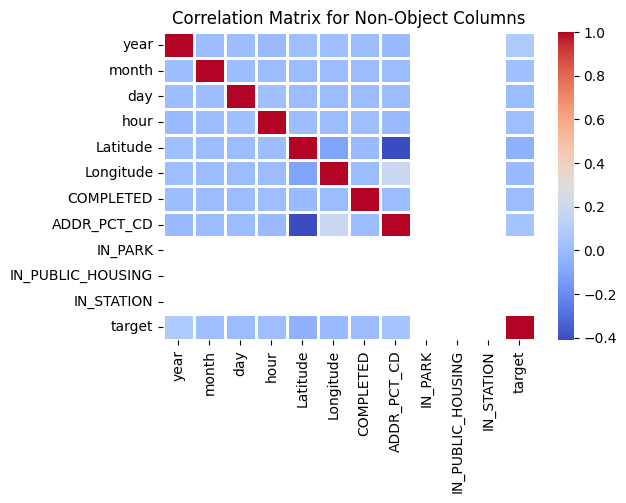

In [20]:
non_object_columns = df_sel.select_dtypes(exclude='object')

# Calculate correlation matrix
corr = non_object_columns.corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, cmap="coolwarm", linewidth=2, linecolor="white",annot=False)
plt.title("Correlation Matrix for Non-Object Columns")
plt.show()

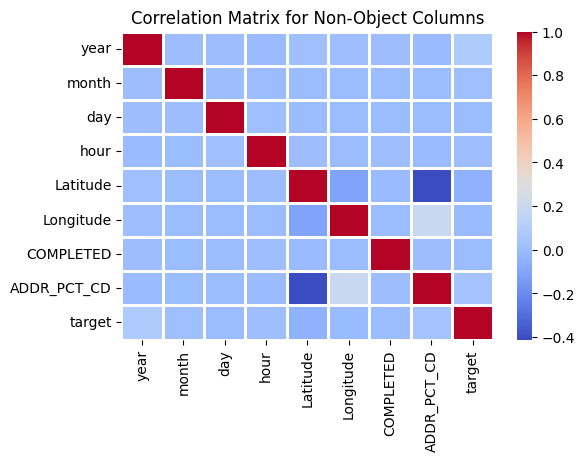

In [22]:
columns_to_exclude = ['IN_PARK', 'IN_PUBLIC_HOUSING', 'IN_STATION']
non_object_columns = df_sel.select_dtypes(exclude='object')
non_object_columns = non_object_columns.drop(columns=columns_to_exclude)

corr = non_object_columns.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, cmap="coolwarm", linewidth=2, linecolor="white", annot=False)
plt.title("Correlation Matrix for Non-Object Columns")
plt.show()

In [21]:
df_sel[['IN_PARK', 'IN_PUBLIC_HOUSING', 'IN_STATION']].nunique()

IN_PARK              1
IN_PUBLIC_HOUSING    1
IN_STATION           1
dtype: int64

**Deal with categorical data**

In [23]:
df = pd.get_dummies(df_sel)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7761268 entries, 0 to 8913191
Data columns (total 39 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   year                                     int64  
 1   month                                    int64  
 2   day                                      int64  
 3   hour                                     int64  
 4   Latitude                                 float64
 5   Longitude                                float64
 6   COMPLETED                                float64
 7   ADDR_PCT_CD                              float64
 8   IN_PARK                                  int64  
 9   IN_PUBLIC_HOUSING                        int64  
 10  IN_STATION                               int64  
 11  target                                   int32  
 12  BORO_NM_(null)                           bool   
 13  BORO_NM_BRONX                            bool   
 14  BORO_NM_BROOKLYN       

change the bool columns to uint8 

In [24]:
bool_columns = df.select_dtypes(include='bool').columns

# Convert boolean columns to uint8
df[bool_columns] = df[bool_columns].astype('uint8')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7761268 entries, 0 to 8913191
Data columns (total 39 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   year                                     int64  
 1   month                                    int64  
 2   day                                      int64  
 3   hour                                     int64  
 4   Latitude                                 float64
 5   Longitude                                float64
 6   COMPLETED                                float64
 7   ADDR_PCT_CD                              float64
 8   IN_PARK                                  int64  
 9   IN_PUBLIC_HOUSING                        int64  
 10  IN_STATION                               int64  
 11  target                                   int32  
 12  BORO_NM_(null)                           uint8  
 13  BORO_NM_BRONX                            uint8  
 14  BORO_NM_BROOKLYN       

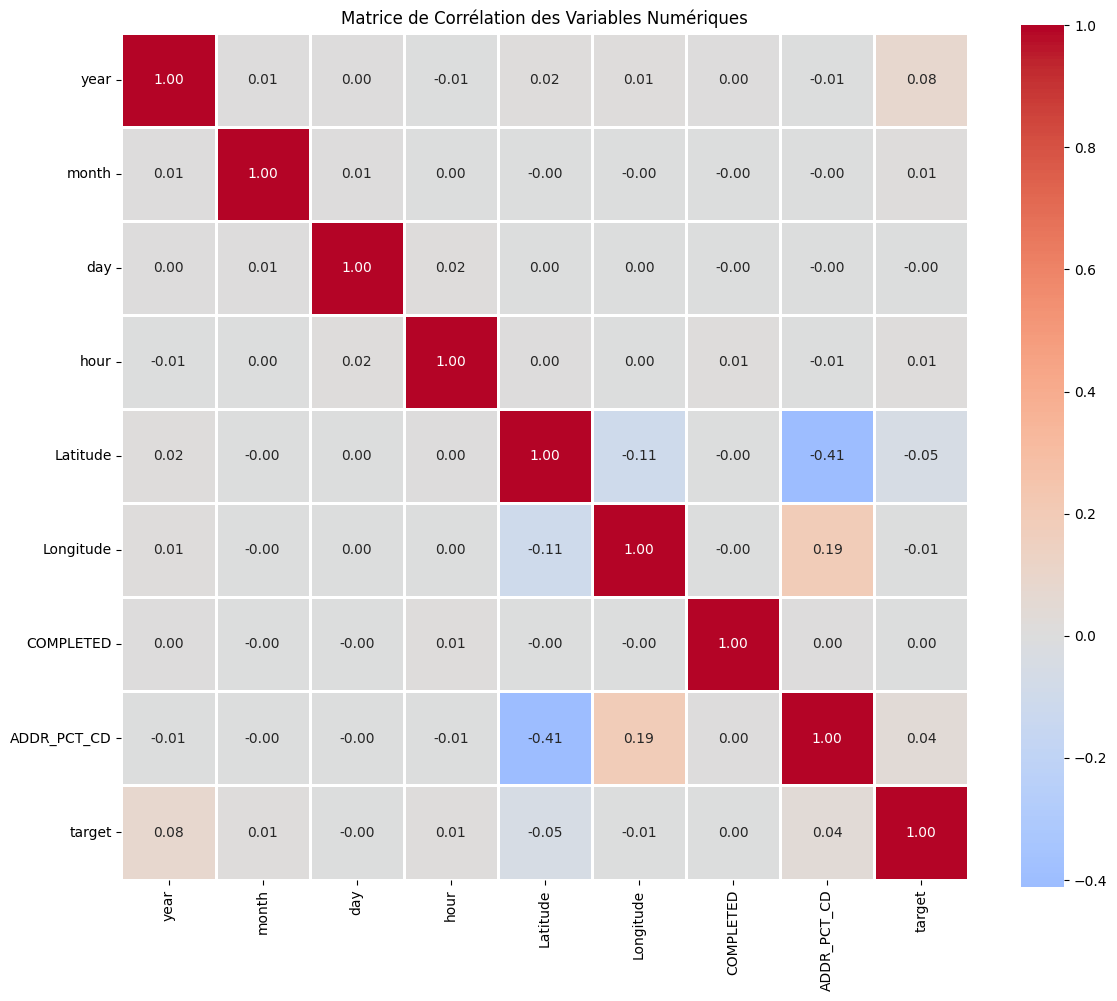

In [27]:
# Sélectionner les colonnes numériques
numeric_columns = df.select_dtypes(include=['int64', 'float64', 'int32']).columns

# Créer une liste des colonnes à exclure
columns_to_exclude = ['IN_PARK', 'IN_PUBLIC_HOUSING', 'IN_STATION']

# Sélectionner toutes les colonnes numériques sauf celles à exclure
df_numeric = df[numeric_columns].drop(columns=columns_to_exclude)

# Calculer et afficher la matrice de corrélation
plt.figure(figsize=(12, 10))
corr = df_numeric.corr()
sns.heatmap(corr, 
            cmap="coolwarm",
            center=0,
            annot=True,
            fmt='.2f',
            linewidths=1,
            square=True)

plt.title("Matrice de Corrélation des Variables Numériques")
plt.tight_layout()
plt.show()